## 산탄데르 고객 만족 예측
- 370개의 피처로 주어진 데이터 세트 기반에서 고객 만족 여부를 예측하는 것
- 산탄데르 은행이 캐글에 경연을 의뢰한 데이터로서 피처 이름은 모두 익명 처리, 어떤 속성인지는 추정 불가
- 클래스 레이블 명은 TARGET, **TARGET=1이면 불만을 가진 고객, TARGET=0이면 만족**한 고객
- 모델의 성능 평가는 ROC-AUC(ROC 곡선)
    - 대부분이 만족이고 불만족인 데이터는 일부일 것이기 때문에 정확도 수치보다는 ROC-AUC가 더 적합
    
</br></br>
- - -
ROC-AUC
- ROC-AUC는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표
- FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선
   - TPR=재현율=민감도, TNR(True Negative Rate)=민감도에 대응하는 지표=특이성
   - TPR은 실제값 Positive(양성)가 정확히 예측돼야 하는 수준(질병이 있는 사람은 질병이 있는 것으로 양성 판정)
   - TNR은 실제값 Negative(음성)가 정확히 예측돼야 하는 수준(질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정)
    - FPR = FP / (FP + TN) = 1 - TNP = 1 - 특이성
    - ROC 곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것, 멀어질수록 성능이 뛰어난 것
    - AUC는 ROC 곡선 밑의 면적을 구한 것, 1에 가까울수록 좋은 수치

### 데이터 전처리

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

cust_df = pd.read_csv('data/santander_train.csv', encoding='latin-1')
print('dataset shape: ', cust_df.shape)
cust_df.head(3)

dataset shape:  (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [7]:
print(cust_df['TARGET'].value_counts(), '\n')
unstatified_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unstatified 비율은 {0:.2f}'.format((unstatified_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64 

unstatified 비율은 0.04


In [8]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [10]:
# var3 컬럼의 경우 min값이 -999999 -> NAN이나 특정 예외 값을 -999999로 변환했을 것
print(cust_df['var3'].value_counts()[:10])

# -999999의 값이 116개
# 다른 값에 비해 편차가 너무 심하므로 -999999를 가장 많은 2로 변환
# ID피처는 단순 식별자에 불과하므로 drop

cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64
피처 데이터 shape:(76020, 369)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

# 비대칭 데이터 세트이므로 클래스인 TARGET값 분포도가 학습 데이터와 테스트 데이트 세트에 모두 비슷하게 추출됐는지 확인
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape), '\n')

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

# 학습과 테스트 데이터 세트 모두 TARGET의 값의 분포가 원본 데이터와 유사하게 전체 데이터의 4% 정도의 불만족 값으로 만들어졌음

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369) 

학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64
테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


### XGBosst 모델 학습과 하이퍼 파라미터 튜닝

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random_state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
           eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))



# average 옵션으로 micro와 macro를 둘 수 있습니다.
    # None : 라벨 별 각 평균을 그대로 구합니다.
    # micro : 전체 평균
    # macro : 라벨 별 각 합의 평균
    
# average를 macro로 두면 각 열에 대한 precision 값을 모두 더한 다음 열의 갯수로 나눈 것입니다.
    # 즉 average를 None으로 두었을 때 구한 각 열의 Precision들을 산술 평균한 값이 macro가 됩니다.

[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.880

In [21]:
# XGBoost의 하이퍼 파라미터 튜닝 수행
# 칼럼의 개수가 많으므로 과적합 가능성을 가정하고, max_depth, min_child_weight, colsample_bytree 하이퍼 파라미터만 일차 튜닝 대상으로
# 학습 시간이 많이 필요한 ML모델인 경우 하이퍼 파라미터 튜닝을 수행하는 요령 중 첫 번째는 먼저 2~3개 정도의 파라미터를 결합해 최적 파라미터를 찾아낸 뒤에
# 이 최적 파라미터를 기반으로 다시 1~2개 파라미터를 결합해 파라미터 튜닝 수행하는 것

# 수행시간이 오래 걸리므로 n_estimators는 100으로 줄이고, early_stopping_rounds로 30으로 줄여서 테스트한 뒤 나중에 튜닝이 완료되면 다시 증가시키자
# GridSearchCV 적용 후에 최적 파라미터가 어떤 것이고, GridSearchCV에서 재학습된 estimator에서 ROC-AUC 수치가 어떻게 향상됐는지 확인해보자

from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7],
         'min_child_weight':[1, 3],
         'colsample_bytree':[0.5, 0.75]}

# cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
          eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터: ', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.79161	validation_1-auc:0.79321
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.81865	validation_1-auc:0.81375
[2]	validation_0-auc:0.82586	validation_1-auc:0.81846
[3]	validation_0-auc:0.82789	validation_1-auc:0.82226
[4]	validation_0-auc:0.83249	validation_1-auc:0.82677
[5]	validation_0-auc:0.83477	validation_1-auc:0.83225
[6]	validation_0-auc:0.83340	validation_1-auc:0.82654
[7]	validation_0-auc:0.84223	validation_1-auc:0.83486
[8]	validation_0-auc:0.84586	validation_1-auc:0.83682
[9]	validation_0-auc:0.84557	validation_1-auc:0.83472
[10]	validation_0-auc:0.84423	validation_1-auc:0.83181
[11]	validation_0-auc:0.84428	validation_1-auc:0.82920
[12]	validation_0-auc:0.85176	validation_1-auc:0.83433
[13]	validation_0-auc:0.85540	validation_1-auc:0.83565
[14]	validation_0-auc:0.85719	validation_1-auc:0.83696
[15]	validation_0-auc:0.8584

[43]	validation_0-auc:0.87525	validation_1-auc:0.84022
[44]	validation_0-auc:0.87595	validation_1-auc:0.83967
[45]	validation_0-auc:0.87630	validation_1-auc:0.84004
[46]	validation_0-auc:0.87700	validation_1-auc:0.83966
[47]	validation_0-auc:0.87743	validation_1-auc:0.83963
[48]	validation_0-auc:0.87770	validation_1-auc:0.83931
[49]	validation_0-auc:0.87782	validation_1-auc:0.83925
[50]	validation_0-auc:0.87827	validation_1-auc:0.83935
[51]	validation_0-auc:0.87862	validation_1-auc:0.83920
[52]	validation_0-auc:0.87951	validation_1-auc:0.83895
[53]	validation_0-auc:0.88027	validation_1-auc:0.83876
[54]	validation_0-auc:0.88118	validation_1-auc:0.83840
[55]	validation_0-auc:0.88128	validation_1-auc:0.83834
[56]	validation_0-auc:0.88146	validation_1-auc:0.83873
[57]	validation_0-auc:0.88158	validation_1-auc:0.83860
[58]	validation_0-auc:0.88183	validation_1-auc:0.83810
[59]	validation_0-auc:0.88192	validation_1-auc:0.83774
[60]	validation_0-auc:0.88215	validation_1-auc:0.83723
Stopping. 

[24]	validation_0-auc:0.86453	validation_1-auc:0.84460
[25]	validation_0-auc:0.86537	validation_1-auc:0.84480
[26]	validation_0-auc:0.86586	validation_1-auc:0.84441
[27]	validation_0-auc:0.86656	validation_1-auc:0.84401
[28]	validation_0-auc:0.86698	validation_1-auc:0.84422
[29]	validation_0-auc:0.86770	validation_1-auc:0.84385
[30]	validation_0-auc:0.86778	validation_1-auc:0.84407
[31]	validation_0-auc:0.86804	validation_1-auc:0.84395
[32]	validation_0-auc:0.86828	validation_1-auc:0.84381
[33]	validation_0-auc:0.86865	validation_1-auc:0.84417
[34]	validation_0-auc:0.86902	validation_1-auc:0.84385
[35]	validation_0-auc:0.86959	validation_1-auc:0.84369
[36]	validation_0-auc:0.87019	validation_1-auc:0.84297
[37]	validation_0-auc:0.87050	validation_1-auc:0.84278
[38]	validation_0-auc:0.87180	validation_1-auc:0.84286
[39]	validation_0-auc:0.87270	validation_1-auc:0.84224
[40]	validation_0-auc:0.87288	validation_1-auc:0.84197
[41]	validation_0-auc:0.87293	validation_1-auc:0.84175
[42]	valid

[22]	validation_0-auc:0.88633	validation_1-auc:0.83706
[23]	validation_0-auc:0.88770	validation_1-auc:0.83714
[24]	validation_0-auc:0.88866	validation_1-auc:0.83742
[25]	validation_0-auc:0.88907	validation_1-auc:0.83753
[26]	validation_0-auc:0.89067	validation_1-auc:0.83634
[27]	validation_0-auc:0.89161	validation_1-auc:0.83565
[28]	validation_0-auc:0.89214	validation_1-auc:0.83460
[29]	validation_0-auc:0.89341	validation_1-auc:0.83413
[30]	validation_0-auc:0.89378	validation_1-auc:0.83373
[31]	validation_0-auc:0.89393	validation_1-auc:0.83396
[32]	validation_0-auc:0.89409	validation_1-auc:0.83435
[33]	validation_0-auc:0.89414	validation_1-auc:0.83412
[34]	validation_0-auc:0.89433	validation_1-auc:0.83386
[35]	validation_0-auc:0.89511	validation_1-auc:0.83338
[36]	validation_0-auc:0.89554	validation_1-auc:0.83232
[37]	validation_0-auc:0.89588	validation_1-auc:0.83223
[38]	validation_0-auc:0.89608	validation_1-auc:0.83222
[39]	validation_0-auc:0.89640	validation_1-auc:0.83187
[40]	valid

[30]	validation_0-auc:0.88457	validation_1-auc:0.84080
[31]	validation_0-auc:0.88542	validation_1-auc:0.84070
[32]	validation_0-auc:0.88561	validation_1-auc:0.84055
[33]	validation_0-auc:0.88609	validation_1-auc:0.84024
[34]	validation_0-auc:0.88632	validation_1-auc:0.83977
[35]	validation_0-auc:0.88638	validation_1-auc:0.83959
[36]	validation_0-auc:0.88644	validation_1-auc:0.83935
[37]	validation_0-auc:0.88730	validation_1-auc:0.83898
[38]	validation_0-auc:0.88803	validation_1-auc:0.83814
[39]	validation_0-auc:0.88817	validation_1-auc:0.83806
[40]	validation_0-auc:0.88815	validation_1-auc:0.83811
[41]	validation_0-auc:0.88838	validation_1-auc:0.83807
[42]	validation_0-auc:0.88881	validation_1-auc:0.83753
[43]	validation_0-auc:0.88902	validation_1-auc:0.83781
[44]	validation_0-auc:0.88912	validation_1-auc:0.83779
Stopping. Best iteration:
[14]	validation_0-auc:0.87102	validation_1-auc:0.84520

[0]	validation_0-auc:0.81007	validation_1-auc:0.80693
Multiple eval metrics have been passed:

[31]	validation_0-auc:0.87189	validation_1-auc:0.84252
[32]	validation_0-auc:0.87276	validation_1-auc:0.84147
[33]	validation_0-auc:0.87303	validation_1-auc:0.84149
[34]	validation_0-auc:0.87350	validation_1-auc:0.84118
[35]	validation_0-auc:0.87370	validation_1-auc:0.84115
[36]	validation_0-auc:0.87408	validation_1-auc:0.84113
[37]	validation_0-auc:0.87477	validation_1-auc:0.84038
[38]	validation_0-auc:0.87530	validation_1-auc:0.84009
[39]	validation_0-auc:0.87541	validation_1-auc:0.83988
[40]	validation_0-auc:0.87556	validation_1-auc:0.83984
[41]	validation_0-auc:0.87580	validation_1-auc:0.83991
[42]	validation_0-auc:0.87631	validation_1-auc:0.83942
[43]	validation_0-auc:0.87667	validation_1-auc:0.83926
[44]	validation_0-auc:0.87715	validation_1-auc:0.83916
[45]	validation_0-auc:0.87765	validation_1-auc:0.83868
Stopping. Best iteration:
[15]	validation_0-auc:0.85990	validation_1-auc:0.84361

[0]	validation_0-auc:0.81105	validation_1-auc:0.80637
Multiple eval metrics have been passed:

[24]	validation_0-auc:0.86688	validation_1-auc:0.84082
[25]	validation_0-auc:0.86778	validation_1-auc:0.84074
[26]	validation_0-auc:0.86849	validation_1-auc:0.84076
[27]	validation_0-auc:0.86909	validation_1-auc:0.84096
[28]	validation_0-auc:0.86930	validation_1-auc:0.84113
[29]	validation_0-auc:0.86973	validation_1-auc:0.84187
[30]	validation_0-auc:0.87070	validation_1-auc:0.84167
[31]	validation_0-auc:0.87108	validation_1-auc:0.84174
[32]	validation_0-auc:0.87124	validation_1-auc:0.84166
[33]	validation_0-auc:0.87154	validation_1-auc:0.84142
[34]	validation_0-auc:0.87216	validation_1-auc:0.84153
[35]	validation_0-auc:0.87288	validation_1-auc:0.84147
[36]	validation_0-auc:0.87324	validation_1-auc:0.84136
[37]	validation_0-auc:0.87343	validation_1-auc:0.84116
[38]	validation_0-auc:0.87351	validation_1-auc:0.84114
[39]	validation_0-auc:0.87406	validation_1-auc:0.84087
[40]	validation_0-auc:0.87415	validation_1-auc:0.84088
[41]	validation_0-auc:0.87540	validation_1-auc:0.84065
[42]	valid

[26]	validation_0-auc:0.89397	validation_1-auc:0.83459
[27]	validation_0-auc:0.89434	validation_1-auc:0.83497
[28]	validation_0-auc:0.89490	validation_1-auc:0.83437
[29]	validation_0-auc:0.89493	validation_1-auc:0.83446
[30]	validation_0-auc:0.89559	validation_1-auc:0.83426
[31]	validation_0-auc:0.89565	validation_1-auc:0.83405
[32]	validation_0-auc:0.89653	validation_1-auc:0.83320
[33]	validation_0-auc:0.89680	validation_1-auc:0.83358
[34]	validation_0-auc:0.89762	validation_1-auc:0.83320
[35]	validation_0-auc:0.89782	validation_1-auc:0.83337
[36]	validation_0-auc:0.89811	validation_1-auc:0.83330
[37]	validation_0-auc:0.89813	validation_1-auc:0.83297
[38]	validation_0-auc:0.89838	validation_1-auc:0.83265
[39]	validation_0-auc:0.89870	validation_1-auc:0.83239
[40]	validation_0-auc:0.89877	validation_1-auc:0.83215
[41]	validation_0-auc:0.89897	validation_1-auc:0.83207
[42]	validation_0-auc:0.89904	validation_1-auc:0.83192
[43]	validation_0-auc:0.89918	validation_1-auc:0.83183
[44]	valid

[32]	validation_0-auc:0.88796	validation_1-auc:0.83611
[33]	validation_0-auc:0.88928	validation_1-auc:0.83562
[34]	validation_0-auc:0.89022	validation_1-auc:0.83498
[35]	validation_0-auc:0.89040	validation_1-auc:0.83515
[36]	validation_0-auc:0.89105	validation_1-auc:0.83420
[37]	validation_0-auc:0.89119	validation_1-auc:0.83435
[38]	validation_0-auc:0.89161	validation_1-auc:0.83405
[39]	validation_0-auc:0.89254	validation_1-auc:0.83376
[40]	validation_0-auc:0.89268	validation_1-auc:0.83387
[41]	validation_0-auc:0.89275	validation_1-auc:0.83334
[42]	validation_0-auc:0.89324	validation_1-auc:0.83343
[43]	validation_0-auc:0.89320	validation_1-auc:0.83370
[44]	validation_0-auc:0.89401	validation_1-auc:0.83323
[45]	validation_0-auc:0.89457	validation_1-auc:0.83295
[46]	validation_0-auc:0.89506	validation_1-auc:0.83239
Stopping. Best iteration:
[16]	validation_0-auc:0.87739	validation_1-auc:0.83927

[0]	validation_0-auc:0.80839	validation_1-auc:0.80987
Multiple eval metrics have been passed:

In [23]:
# 앞에서 구한 최적화 하이퍼 파라미터를 기반으로 다른 하이퍼 파라미터를 변경 또는 추가
# 위의 최적 하이퍼 파라미터로 설정한 뒤, n_estimatros=1000으로 증가, learning_rate=0.02로 감소, reg_alpha(L1 정규화)=0.03 추가

xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,
                       min_child_weight=3, colsample_bytree=0.5, reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200,
           eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.72742	validation_1-auc:0.73391
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.80715	validation_1-auc:0.81071
[2]	validation_0-auc:0.80624	validation_1-auc:0.80581
[3]	validation_0-auc:0.80964	validation_1-auc:0.80898
[4]	validation_0-auc:0.80673	validation_1-auc:0.80736
[5]	validation_0-auc:0.81446	validation_1-auc:0.81287
[6]	validation_0-auc:0.81886	validation_1-auc:0.81845
[7]	validation_0-auc:0.82326	validation_1-auc:0.82152
[8]	validation_0-auc:0.82781	validation_1-auc:0.82588
[9]	validation_0-auc:0.82420	validation_1-auc:0.82216
[10]	validation_0-auc:0.82748	validation_1-auc:0.82432
[11]	validation_0-auc:0.82418	validation_1-auc:0.82284
[12]	validation_0-auc:0.82709	validation_1-auc:0.82502
[13]	validation_0-auc:0.82475	validation_1-auc:0.82316
[14]	validation_0-auc:0.82757	validation_1-auc:0.82608
[15]	validation_0-auc:0.825

[146]	validation_0-auc:0.85222	validation_1-auc:0.84027
[147]	validation_0-auc:0.85217	validation_1-auc:0.84034
[148]	validation_0-auc:0.85214	validation_1-auc:0.84051
[149]	validation_0-auc:0.85213	validation_1-auc:0.84037
[150]	validation_0-auc:0.85200	validation_1-auc:0.84042
[151]	validation_0-auc:0.85242	validation_1-auc:0.84053
[152]	validation_0-auc:0.85273	validation_1-auc:0.84066
[153]	validation_0-auc:0.85309	validation_1-auc:0.84080
[154]	validation_0-auc:0.85302	validation_1-auc:0.84083
[155]	validation_0-auc:0.85296	validation_1-auc:0.84065
[156]	validation_0-auc:0.85298	validation_1-auc:0.84057
[157]	validation_0-auc:0.85326	validation_1-auc:0.84085
[158]	validation_0-auc:0.85354	validation_1-auc:0.84108
[159]	validation_0-auc:0.85350	validation_1-auc:0.84102
[160]	validation_0-auc:0.85339	validation_1-auc:0.84076
[161]	validation_0-auc:0.85352	validation_1-auc:0.84071
[162]	validation_0-auc:0.85358	validation_1-auc:0.84071
[163]	validation_0-auc:0.85359	validation_1-auc:

[293]	validation_0-auc:0.87058	validation_1-auc:0.84601
[294]	validation_0-auc:0.87068	validation_1-auc:0.84590
[295]	validation_0-auc:0.87073	validation_1-auc:0.84593
[296]	validation_0-auc:0.87084	validation_1-auc:0.84592
[297]	validation_0-auc:0.87098	validation_1-auc:0.84586
[298]	validation_0-auc:0.87100	validation_1-auc:0.84585
[299]	validation_0-auc:0.87103	validation_1-auc:0.84590
[300]	validation_0-auc:0.87107	validation_1-auc:0.84586
[301]	validation_0-auc:0.87118	validation_1-auc:0.84589
[302]	validation_0-auc:0.87119	validation_1-auc:0.84589
[303]	validation_0-auc:0.87126	validation_1-auc:0.84590
[304]	validation_0-auc:0.87133	validation_1-auc:0.84587
[305]	validation_0-auc:0.87138	validation_1-auc:0.84587
[306]	validation_0-auc:0.87143	validation_1-auc:0.84583
[307]	validation_0-auc:0.87146	validation_1-auc:0.84579
[308]	validation_0-auc:0.87154	validation_1-auc:0.84579
[309]	validation_0-auc:0.87160	validation_1-auc:0.84580
[310]	validation_0-auc:0.87165	validation_1-auc:

[440]	validation_0-auc:0.87850	validation_1-auc:0.84521
[441]	validation_0-auc:0.87852	validation_1-auc:0.84520
[442]	validation_0-auc:0.87856	validation_1-auc:0.84518
[443]	validation_0-auc:0.87864	validation_1-auc:0.84519
[444]	validation_0-auc:0.87868	validation_1-auc:0.84518
[445]	validation_0-auc:0.87874	validation_1-auc:0.84518
[446]	validation_0-auc:0.87878	validation_1-auc:0.84520
[447]	validation_0-auc:0.87881	validation_1-auc:0.84518
[448]	validation_0-auc:0.87882	validation_1-auc:0.84518
[449]	validation_0-auc:0.87890	validation_1-auc:0.84516
[450]	validation_0-auc:0.87895	validation_1-auc:0.84513
[451]	validation_0-auc:0.87899	validation_1-auc:0.84513
[452]	validation_0-auc:0.87906	validation_1-auc:0.84514
[453]	validation_0-auc:0.87912	validation_1-auc:0.84515
[454]	validation_0-auc:0.87916	validation_1-auc:0.84508
[455]	validation_0-auc:0.87920	validation_1-auc:0.84505
[456]	validation_0-auc:0.87922	validation_1-auc:0.84506
[457]	validation_0-auc:0.87930	validation_1-auc:

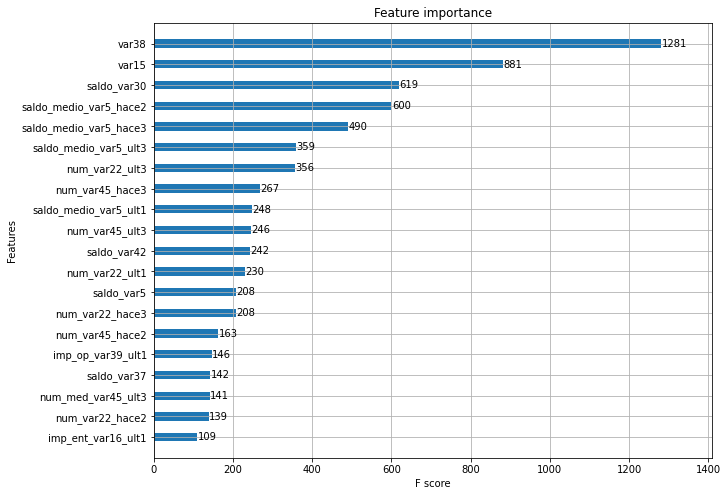

In [25]:
# 튜닝된 모델에서 각 피처의 중요도를 피처 중요도 그래프로 나타내보자
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [26]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals,
            verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[131]	valid_0's auc: 0.836033	valid_0's binary_logloss: 0.140835
[132]	valid_0's auc: 0.836014	valid_0's binary_logloss: 0.140852
[133]	valid_0's auc: 0.835977	valid_0's binary_logloss: 0.1409
[134]	valid_0's auc: 0.835695	valid_0's binary_logloss: 0.140951
[135]	valid_0's auc: 0.835689	valid_0's binary_logloss: 0.140975
[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408
ROC AUC: 0.8396


In [27]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 200으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves':[32, 64,],
         'max_depth':[128, 160],
         'min_child_samples':[60, 100],
         'subsample':[0.8, 1]}

# cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
          eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터: ', gridcv.best_params_)

lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827305	valid_1's binary_logloss: 0.156391
[4]	valid_0's auc: 0.837507	valid_0's binary_logloss: 0.144132	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.15332
[5]	valid_0's auc: 0.842275	valid_0's binary_logloss: 0.141652	valid_1's auc: 0.836036	valid_1's binary_logloss: 0.150954
[6]	valid_0's auc: 0.844971	valid_0's binary_logloss: 0.139662	valid_1's auc: 0.838026	valid_1's binary_logloss: 0.149041
[7]	valid_0's auc: 0.846612	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.147504
[8]	valid_0's auc: 0.848539	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.839506	va

[28]	valid_0's auc: 0.873243	valid_0's binary_logloss: 0.124448	valid_1's auc: 0.837467	valid_1's binary_logloss: 0.139828
[29]	valid_0's auc: 0.873959	valid_0's binary_logloss: 0.124164	valid_1's auc: 0.83751	valid_1's binary_logloss: 0.139781
[30]	valid_0's auc: 0.874666	valid_0's binary_logloss: 0.123934	valid_1's auc: 0.837891	valid_1's binary_logloss: 0.139667
[31]	valid_0's auc: 0.875615	valid_0's binary_logloss: 0.123703	valid_1's auc: 0.83861	valid_1's binary_logloss: 0.139545
[32]	valid_0's auc: 0.876151	valid_0's binary_logloss: 0.123475	valid_1's auc: 0.838762	valid_1's binary_logloss: 0.13945
[33]	valid_0's auc: 0.877026	valid_0's binary_logloss: 0.123248	valid_1's auc: 0.838799	valid_1's binary_logloss: 0.139439
[34]	valid_0's auc: 0.877606	valid_0's binary_logloss: 0.123057	valid_1's auc: 0.838511	valid_1's binary_logloss: 0.139447
[35]	valid_0's auc: 0.878266	valid_0's binary_logloss: 0.122861	valid_1's auc: 0.838604	valid_1's binary_logloss: 0.139413
[36]	valid_0's auc:

[24]	valid_0's auc: 0.869053	valid_0's binary_logloss: 0.126193	valid_1's auc: 0.83904	valid_1's binary_logloss: 0.139968
[25]	valid_0's auc: 0.869728	valid_0's binary_logloss: 0.12589	valid_1's auc: 0.839059	valid_1's binary_logloss: 0.139803
[26]	valid_0's auc: 0.870373	valid_0's binary_logloss: 0.125571	valid_1's auc: 0.839138	valid_1's binary_logloss: 0.139698
[27]	valid_0's auc: 0.871341	valid_0's binary_logloss: 0.125257	valid_1's auc: 0.838837	valid_1's binary_logloss: 0.139664
[28]	valid_0's auc: 0.872255	valid_0's binary_logloss: 0.124955	valid_1's auc: 0.838733	valid_1's binary_logloss: 0.139614
[29]	valid_0's auc: 0.872979	valid_0's binary_logloss: 0.124683	valid_1's auc: 0.838445	valid_1's binary_logloss: 0.139634
[30]	valid_0's auc: 0.873557	valid_0's binary_logloss: 0.12443	valid_1's auc: 0.838392	valid_1's binary_logloss: 0.139581
[31]	valid_0's auc: 0.874202	valid_0's binary_logloss: 0.124188	valid_1's auc: 0.837993	valid_1's binary_logloss: 0.139633
[32]	valid_0's auc:

[38]	valid_0's auc: 0.878728	valid_0's binary_logloss: 0.122378	valid_1's auc: 0.833827	valid_1's binary_logloss: 0.140119
[39]	valid_0's auc: 0.879195	valid_0's binary_logloss: 0.122177	valid_1's auc: 0.833696	valid_1's binary_logloss: 0.140111
Early stopping, best iteration is:
[9]	valid_0's auc: 0.850098	valid_0's binary_logloss: 0.135283	valid_1's auc: 0.84033	valid_1's binary_logloss: 0.144934
[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827202	valid_0's binary_logloss: 0.151081	valid_1's auc: 0.819989	valid_1's binary_logloss: 0.160086
[3]	valid_0's auc: 0.836893	valid_0's binary_logloss: 0.147219	valid_1's auc: 0.828833	valid_1's binary_logloss: 0.156403
[4]	valid_0's auc: 0.841451	valid_0's binary_logloss: 0.144211	valid_1's auc: 0.830881	valid_1's binary_logloss: 0.153547
[5]	valid_0's auc: 0.843957	valid_0's binary_logl

[66]	valid_0's auc: 0.891444	valid_0's binary_logloss: 0.117294	valid_1's auc: 0.837798	valid_1's binary_logloss: 0.139968
[67]	valid_0's auc: 0.891558	valid_0's binary_logloss: 0.117199	valid_1's auc: 0.837884	valid_1's binary_logloss: 0.139951
[68]	valid_0's auc: 0.891842	valid_0's binary_logloss: 0.117047	valid_1's auc: 0.837726	valid_1's binary_logloss: 0.139964
[69]	valid_0's auc: 0.892333	valid_0's binary_logloss: 0.116905	valid_1's auc: 0.837619	valid_1's binary_logloss: 0.140006
[70]	valid_0's auc: 0.892833	valid_0's binary_logloss: 0.116695	valid_1's auc: 0.837858	valid_1's binary_logloss: 0.139965
[71]	valid_0's auc: 0.892846	valid_0's binary_logloss: 0.116607	valid_1's auc: 0.837642	valid_1's binary_logloss: 0.140063
[72]	valid_0's auc: 0.892948	valid_0's binary_logloss: 0.116525	valid_1's auc: 0.837423	valid_1's binary_logloss: 0.140129
Early stopping, best iteration is:
[42]	valid_0's auc: 0.882841	valid_0's binary_logloss: 0.121168	valid_1's auc: 0.83955	valid_1's binary_

[6]	valid_0's auc: 0.857317	valid_0's binary_logloss: 0.137571	valid_1's auc: 0.834748	valid_1's binary_logloss: 0.149408
[7]	valid_0's auc: 0.860006	valid_0's binary_logloss: 0.13571	valid_1's auc: 0.834676	valid_1's binary_logloss: 0.14797
[8]	valid_0's auc: 0.862097	valid_0's binary_logloss: 0.134125	valid_1's auc: 0.833523	valid_1's binary_logloss: 0.146851
[9]	valid_0's auc: 0.863502	valid_0's binary_logloss: 0.132674	valid_1's auc: 0.83389	valid_1's binary_logloss: 0.145855
[10]	valid_0's auc: 0.865388	valid_0's binary_logloss: 0.131436	valid_1's auc: 0.83527	valid_1's binary_logloss: 0.145006
[11]	valid_0's auc: 0.867991	valid_0's binary_logloss: 0.130246	valid_1's auc: 0.834165	valid_1's binary_logloss: 0.14443
[12]	valid_0's auc: 0.868905	valid_0's binary_logloss: 0.129245	valid_1's auc: 0.834913	valid_1's binary_logloss: 0.143794
[13]	valid_0's auc: 0.871383	valid_0's binary_logloss: 0.128279	valid_1's auc: 0.835098	valid_1's binary_logloss: 0.143188
[14]	valid_0's auc: 0.872

[33]	valid_0's auc: 0.894932	valid_0's binary_logloss: 0.116716	valid_1's auc: 0.833793	valid_1's binary_logloss: 0.140491
[34]	valid_0's auc: 0.895434	valid_0's binary_logloss: 0.116371	valid_1's auc: 0.834146	valid_1's binary_logloss: 0.140476
[35]	valid_0's auc: 0.896238	valid_0's binary_logloss: 0.11604	valid_1's auc: 0.833608	valid_1's binary_logloss: 0.140613
[36]	valid_0's auc: 0.896761	valid_0's binary_logloss: 0.115738	valid_1's auc: 0.833866	valid_1's binary_logloss: 0.140566
[37]	valid_0's auc: 0.897255	valid_0's binary_logloss: 0.115445	valid_1's auc: 0.833835	valid_1's binary_logloss: 0.140618
[38]	valid_0's auc: 0.897979	valid_0's binary_logloss: 0.115107	valid_1's auc: 0.833409	valid_1's binary_logloss: 0.14069
[39]	valid_0's auc: 0.898947	valid_0's binary_logloss: 0.114705	valid_1's auc: 0.833262	valid_1's binary_logloss: 0.140754
[40]	valid_0's auc: 0.899579	valid_0's binary_logloss: 0.114409	valid_1's auc: 0.833304	valid_1's binary_logloss: 0.140759
[41]	valid_0's auc

[12]	valid_0's auc: 0.868905	valid_0's binary_logloss: 0.129245	valid_1's auc: 0.834913	valid_1's binary_logloss: 0.143794
[13]	valid_0's auc: 0.871383	valid_0's binary_logloss: 0.128279	valid_1's auc: 0.835098	valid_1's binary_logloss: 0.143188
[14]	valid_0's auc: 0.872929	valid_0's binary_logloss: 0.127403	valid_1's auc: 0.833943	valid_1's binary_logloss: 0.142967
[15]	valid_0's auc: 0.87404	valid_0's binary_logloss: 0.126607	valid_1's auc: 0.833167	valid_1's binary_logloss: 0.142812
[16]	valid_0's auc: 0.875242	valid_0's binary_logloss: 0.12587	valid_1's auc: 0.832607	valid_1's binary_logloss: 0.142587
[17]	valid_0's auc: 0.876378	valid_0's binary_logloss: 0.125177	valid_1's auc: 0.83187	valid_1's binary_logloss: 0.142458
[18]	valid_0's auc: 0.877407	valid_0's binary_logloss: 0.124483	valid_1's auc: 0.83163	valid_1's binary_logloss: 0.142321
[19]	valid_0's auc: 0.878701	valid_0's binary_logloss: 0.123852	valid_1's auc: 0.831198	valid_1's binary_logloss: 0.142189
[20]	valid_0's auc: 

[39]	valid_0's auc: 0.898947	valid_0's binary_logloss: 0.114705	valid_1's auc: 0.833262	valid_1's binary_logloss: 0.140754
[40]	valid_0's auc: 0.899579	valid_0's binary_logloss: 0.114409	valid_1's auc: 0.833304	valid_1's binary_logloss: 0.140759
[41]	valid_0's auc: 0.900418	valid_0's binary_logloss: 0.114104	valid_1's auc: 0.833244	valid_1's binary_logloss: 0.140854
[42]	valid_0's auc: 0.901143	valid_0's binary_logloss: 0.113727	valid_1's auc: 0.83271	valid_1's binary_logloss: 0.14096
[43]	valid_0's auc: 0.901603	valid_0's binary_logloss: 0.113493	valid_1's auc: 0.832882	valid_1's binary_logloss: 0.141012
Early stopping, best iteration is:
[13]	valid_0's auc: 0.871602	valid_0's binary_logloss: 0.127987	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.142313
[1]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.155759	valid_1's auc: 0.816734	valid_1's binary_logloss: 0.164985
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.839231	valid_0's binary_l

[17]	valid_0's auc: 0.858305	valid_0's binary_logloss: 0.129992	valid_1's auc: 0.837057	valid_1's binary_logloss: 0.141205
[18]	valid_0's auc: 0.859993	valid_0's binary_logloss: 0.129467	valid_1's auc: 0.836921	valid_1's binary_logloss: 0.140976
[19]	valid_0's auc: 0.86106	valid_0's binary_logloss: 0.129012	valid_1's auc: 0.83589	valid_1's binary_logloss: 0.140875
[20]	valid_0's auc: 0.862262	valid_0's binary_logloss: 0.128583	valid_1's auc: 0.83514	valid_1's binary_logloss: 0.140788
[21]	valid_0's auc: 0.863124	valid_0's binary_logloss: 0.128215	valid_1's auc: 0.834338	valid_1's binary_logloss: 0.140701
[22]	valid_0's auc: 0.864137	valid_0's binary_logloss: 0.127857	valid_1's auc: 0.834962	valid_1's binary_logloss: 0.140517
[23]	valid_0's auc: 0.864726	valid_0's binary_logloss: 0.127534	valid_1's auc: 0.834234	valid_1's binary_logloss: 0.140485
[24]	valid_0's auc: 0.865628	valid_0's binary_logloss: 0.127205	valid_1's auc: 0.833672	valid_1's binary_logloss: 0.140477
[25]	valid_0's auc:

[8]	valid_0's auc: 0.847226	valid_0's binary_logloss: 0.137121	valid_1's auc: 0.836079	valid_1's binary_logloss: 0.146629
[9]	valid_0's auc: 0.850143	valid_0's binary_logloss: 0.135919	valid_1's auc: 0.835641	valid_1's binary_logloss: 0.145692
[10]	valid_0's auc: 0.851387	valid_0's binary_logloss: 0.134841	valid_1's auc: 0.835182	valid_1's binary_logloss: 0.144896
[11]	valid_0's auc: 0.852703	valid_0's binary_logloss: 0.133863	valid_1's auc: 0.835457	valid_1's binary_logloss: 0.144127
[12]	valid_0's auc: 0.854998	valid_0's binary_logloss: 0.133034	valid_1's auc: 0.836932	valid_1's binary_logloss: 0.143464
[13]	valid_0's auc: 0.856458	valid_0's binary_logloss: 0.132288	valid_1's auc: 0.836525	valid_1's binary_logloss: 0.143031
[14]	valid_0's auc: 0.857578	valid_0's binary_logloss: 0.131588	valid_1's auc: 0.836371	valid_1's binary_logloss: 0.142638
[15]	valid_0's auc: 0.858803	valid_0's binary_logloss: 0.130965	valid_1's auc: 0.836382	valid_1's binary_logloss: 0.142207
[16]	valid_0's auc

[78]	valid_0's auc: 0.889594	valid_0's binary_logloss: 0.117323	valid_1's auc: 0.837358	valid_1's binary_logloss: 0.140162
[79]	valid_0's auc: 0.889725	valid_0's binary_logloss: 0.117242	valid_1's auc: 0.837296	valid_1's binary_logloss: 0.140191
[80]	valid_0's auc: 0.890095	valid_0's binary_logloss: 0.117092	valid_1's auc: 0.837436	valid_1's binary_logloss: 0.140182
[81]	valid_0's auc: 0.890237	valid_0's binary_logloss: 0.116991	valid_1's auc: 0.837617	valid_1's binary_logloss: 0.140185
[82]	valid_0's auc: 0.89035	valid_0's binary_logloss: 0.116893	valid_1's auc: 0.837676	valid_1's binary_logloss: 0.140191
[83]	valid_0's auc: 0.890464	valid_0's binary_logloss: 0.116801	valid_1's auc: 0.837537	valid_1's binary_logloss: 0.140249
[84]	valid_0's auc: 0.890869	valid_0's binary_logloss: 0.116619	valid_1's auc: 0.837565	valid_1's binary_logloss: 0.140263
[85]	valid_0's auc: 0.891174	valid_0's binary_logloss: 0.116509	valid_1's auc: 0.837241	valid_1's binary_logloss: 0.140345
[86]	valid_0's au

[18]	valid_0's auc: 0.862022	valid_0's binary_logloss: 0.12915	valid_1's auc: 0.839358	valid_1's binary_logloss: 0.140433
[19]	valid_0's auc: 0.863252	valid_0's binary_logloss: 0.128659	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.140181
[20]	valid_0's auc: 0.863823	valid_0's binary_logloss: 0.128254	valid_1's auc: 0.840096	valid_1's binary_logloss: 0.139974
[21]	valid_0's auc: 0.864524	valid_0's binary_logloss: 0.127855	valid_1's auc: 0.840183	valid_1's binary_logloss: 0.139827
[22]	valid_0's auc: 0.865553	valid_0's binary_logloss: 0.127461	valid_1's auc: 0.840042	valid_1's binary_logloss: 0.139714
[23]	valid_0's auc: 0.866427	valid_0's binary_logloss: 0.127109	valid_1's auc: 0.839501	valid_1's binary_logloss: 0.13974
[24]	valid_0's auc: 0.86716	valid_0's binary_logloss: 0.126769	valid_1's auc: 0.83965	valid_1's binary_logloss: 0.13959
[25]	valid_0's auc: 0.868035	valid_0's binary_logloss: 0.126454	valid_1's auc: 0.839131	valid_1's binary_logloss: 0.139583
[26]	valid_0's auc: 0

[46]	valid_0's auc: 0.881124	valid_0's binary_logloss: 0.121712	valid_1's auc: 0.837228	valid_1's binary_logloss: 0.139706
[47]	valid_0's auc: 0.881391	valid_0's binary_logloss: 0.121548	valid_1's auc: 0.837146	valid_1's binary_logloss: 0.139699
[48]	valid_0's auc: 0.881926	valid_0's binary_logloss: 0.121346	valid_1's auc: 0.837387	valid_1's binary_logloss: 0.139641
[49]	valid_0's auc: 0.882497	valid_0's binary_logloss: 0.121183	valid_1's auc: 0.837464	valid_1's binary_logloss: 0.13965
[50]	valid_0's auc: 0.882962	valid_0's binary_logloss: 0.121013	valid_1's auc: 0.837347	valid_1's binary_logloss: 0.139684
[51]	valid_0's auc: 0.883328	valid_0's binary_logloss: 0.120868	valid_1's auc: 0.837533	valid_1's binary_logloss: 0.139662
[52]	valid_0's auc: 0.883845	valid_0's binary_logloss: 0.12066	valid_1's auc: 0.838071	valid_1's binary_logloss: 0.139589
[53]	valid_0's auc: 0.884228	valid_0's binary_logloss: 0.120503	valid_1's auc: 0.837994	valid_1's binary_logloss: 0.139593
[54]	valid_0's auc

[25]	valid_0's auc: 0.881183	valid_0's binary_logloss: 0.12235	valid_1's auc: 0.831519	valid_1's binary_logloss: 0.141142
[26]	valid_0's auc: 0.882242	valid_0's binary_logloss: 0.121911	valid_1's auc: 0.83122	valid_1's binary_logloss: 0.141125
[27]	valid_0's auc: 0.882894	valid_0's binary_logloss: 0.121503	valid_1's auc: 0.830821	valid_1's binary_logloss: 0.141169
[28]	valid_0's auc: 0.883863	valid_0's binary_logloss: 0.121051	valid_1's auc: 0.830774	valid_1's binary_logloss: 0.141164
[29]	valid_0's auc: 0.884664	valid_0's binary_logloss: 0.12066	valid_1's auc: 0.830255	valid_1's binary_logloss: 0.141239
[30]	valid_0's auc: 0.885346	valid_0's binary_logloss: 0.120322	valid_1's auc: 0.829487	valid_1's binary_logloss: 0.141355
[31]	valid_0's auc: 0.88669	valid_0's binary_logloss: 0.119914	valid_1's auc: 0.829648	valid_1's binary_logloss: 0.141339
[32]	valid_0's auc: 0.887524	valid_0's binary_logloss: 0.119542	valid_1's auc: 0.829315	valid_1's binary_logloss: 0.14135
[33]	valid_0's auc: 0

[6]	valid_0's auc: 0.855865	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.834424	valid_1's binary_logloss: 0.148857
[7]	valid_0's auc: 0.857298	valid_0's binary_logloss: 0.136482	valid_1's auc: 0.835442	valid_1's binary_logloss: 0.147407
[8]	valid_0's auc: 0.858957	valid_0's binary_logloss: 0.134832	valid_1's auc: 0.835673	valid_1's binary_logloss: 0.146173
[9]	valid_0's auc: 0.861749	valid_0's binary_logloss: 0.133462	valid_1's auc: 0.835295	valid_1's binary_logloss: 0.145247
[10]	valid_0's auc: 0.863187	valid_0's binary_logloss: 0.132297	valid_1's auc: 0.835558	valid_1's binary_logloss: 0.144397
[11]	valid_0's auc: 0.86518	valid_0's binary_logloss: 0.131209	valid_1's auc: 0.835465	valid_1's binary_logloss: 0.143714
[12]	valid_0's auc: 0.866937	valid_0's binary_logloss: 0.130224	valid_1's auc: 0.835379	valid_1's binary_logloss: 0.143043
[13]	valid_0's auc: 0.869703	valid_0's binary_logloss: 0.129241	valid_1's auc: 0.836269	valid_1's binary_logloss: 0.142451
[14]	valid_0's auc: 0

[18]	valid_0's auc: 0.874082	valid_0's binary_logloss: 0.125944	valid_1's auc: 0.833668	valid_1's binary_logloss: 0.141517
[19]	valid_0's auc: 0.875136	valid_0's binary_logloss: 0.125371	valid_1's auc: 0.832742	valid_1's binary_logloss: 0.141507
[20]	valid_0's auc: 0.876197	valid_0's binary_logloss: 0.124814	valid_1's auc: 0.832569	valid_1's binary_logloss: 0.141376
[21]	valid_0's auc: 0.877286	valid_0's binary_logloss: 0.124265	valid_1's auc: 0.831531	valid_1's binary_logloss: 0.141369
[22]	valid_0's auc: 0.878351	valid_0's binary_logloss: 0.12376	valid_1's auc: 0.831493	valid_1's binary_logloss: 0.141291
[23]	valid_0's auc: 0.87915	valid_0's binary_logloss: 0.123252	valid_1's auc: 0.831944	valid_1's binary_logloss: 0.141173
[24]	valid_0's auc: 0.88009	valid_0's binary_logloss: 0.122817	valid_1's auc: 0.831531	valid_1's binary_logloss: 0.141183
[25]	valid_0's auc: 0.881183	valid_0's binary_logloss: 0.12235	valid_1's auc: 0.831519	valid_1's binary_logloss: 0.141142
[26]	valid_0's auc: 

[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842399	valid_0's binary_logloss: 0.150505	valid_1's auc: 0.82874	valid_1's binary_logloss: 0.159789
[3]	valid_0's auc: 0.847465	valid_0's binary_logloss: 0.146325	valid_1's auc: 0.830964	valid_1's binary_logloss: 0.155994
[4]	valid_0's auc: 0.850024	valid_0's binary_logloss: 0.14313	valid_1's auc: 0.831698	valid_1's binary_logloss: 0.153168
[5]	valid_0's auc: 0.853487	valid_0's binary_logloss: 0.140492	valid_1's auc: 0.834088	valid_1's binary_logloss: 0.150751
[6]	valid_0's auc: 0.855865	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.834424	valid_1's binary_logloss: 0.148857
[7]	valid_0's auc: 0.857298	valid_0's binary_logloss: 0.136482	valid_1's auc: 0.835442	valid_1's binary_logloss: 0.147407
[8]	valid_0's auc: 0.858957	valid_0's binary_logloss: 0.134832	valid_1's auc: 0.835673	v

[12]	valid_0's auc: 0.854898	valid_0's binary_logloss: 0.132408	valid_1's auc: 0.838961	valid_1's binary_logloss: 0.142828
[13]	valid_0's auc: 0.855877	valid_0's binary_logloss: 0.131678	valid_1's auc: 0.839079	valid_1's binary_logloss: 0.142265
[14]	valid_0's auc: 0.857256	valid_0's binary_logloss: 0.130972	valid_1's auc: 0.838458	valid_1's binary_logloss: 0.14192
[15]	valid_0's auc: 0.85849	valid_0's binary_logloss: 0.130365	valid_1's auc: 0.837837	valid_1's binary_logloss: 0.141638
[16]	valid_0's auc: 0.859518	valid_0's binary_logloss: 0.129795	valid_1's auc: 0.837919	valid_1's binary_logloss: 0.141266
[17]	valid_0's auc: 0.86107	valid_0's binary_logloss: 0.129246	valid_1's auc: 0.837675	valid_1's binary_logloss: 0.141008
[18]	valid_0's auc: 0.862382	valid_0's binary_logloss: 0.128764	valid_1's auc: 0.83754	valid_1's binary_logloss: 0.140844
[19]	valid_0's auc: 0.86341	valid_0's binary_logloss: 0.128294	valid_1's auc: 0.836495	valid_1's binary_logloss: 0.140732
[20]	valid_0's auc: 0

[42]	valid_0's auc: 0.882841	valid_0's binary_logloss: 0.121168	valid_1's auc: 0.83955	valid_1's binary_logloss: 0.139266
[43]	valid_0's auc: 0.883416	valid_0's binary_logloss: 0.120936	valid_1's auc: 0.839046	valid_1's binary_logloss: 0.139368
[44]	valid_0's auc: 0.883946	valid_0's binary_logloss: 0.120707	valid_1's auc: 0.839079	valid_1's binary_logloss: 0.139372
[45]	valid_0's auc: 0.884413	valid_0's binary_logloss: 0.120517	valid_1's auc: 0.839058	valid_1's binary_logloss: 0.139355
[46]	valid_0's auc: 0.884779	valid_0's binary_logloss: 0.120366	valid_1's auc: 0.839074	valid_1's binary_logloss: 0.139393
[47]	valid_0's auc: 0.885151	valid_0's binary_logloss: 0.120167	valid_1's auc: 0.838763	valid_1's binary_logloss: 0.139448
[48]	valid_0's auc: 0.885423	valid_0's binary_logloss: 0.120017	valid_1's auc: 0.838439	valid_1's binary_logloss: 0.13953
[49]	valid_0's auc: 0.885803	valid_0's binary_logloss: 0.119829	valid_1's auc: 0.83829	valid_1's binary_logloss: 0.139561
[50]	valid_0's auc:

[38]	valid_0's auc: 0.878325	valid_0's binary_logloss: 0.122494	valid_1's auc: 0.83832	valid_1's binary_logloss: 0.139527
[39]	valid_0's auc: 0.878917	valid_0's binary_logloss: 0.122248	valid_1's auc: 0.838503	valid_1's binary_logloss: 0.139516
[40]	valid_0's auc: 0.879406	valid_0's binary_logloss: 0.122038	valid_1's auc: 0.838825	valid_1's binary_logloss: 0.139475
[41]	valid_0's auc: 0.87982	valid_0's binary_logloss: 0.121865	valid_1's auc: 0.838607	valid_1's binary_logloss: 0.139525
[42]	valid_0's auc: 0.880217	valid_0's binary_logloss: 0.121697	valid_1's auc: 0.838459	valid_1's binary_logloss: 0.139582
[43]	valid_0's auc: 0.881131	valid_0's binary_logloss: 0.121448	valid_1's auc: 0.838519	valid_1's binary_logloss: 0.139571
[44]	valid_0's auc: 0.881502	valid_0's binary_logloss: 0.121268	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.13955
[45]	valid_0's auc: 0.881982	valid_0's binary_logloss: 0.121081	valid_1's auc: 0.83858	valid_1's binary_logloss: 0.139559
[46]	valid_0's auc: 

[6]	valid_0's auc: 0.847748	valid_0's binary_logloss: 0.139678	valid_1's auc: 0.836614	valid_1's binary_logloss: 0.149329
[7]	valid_0's auc: 0.849327	valid_0's binary_logloss: 0.137985	valid_1's auc: 0.836739	valid_1's binary_logloss: 0.147839
[8]	valid_0's auc: 0.850907	valid_0's binary_logloss: 0.136536	valid_1's auc: 0.836711	valid_1's binary_logloss: 0.146655
[9]	valid_0's auc: 0.85358	valid_0's binary_logloss: 0.135271	valid_1's auc: 0.838258	valid_1's binary_logloss: 0.145525
[10]	valid_0's auc: 0.854862	valid_0's binary_logloss: 0.134171	valid_1's auc: 0.837503	valid_1's binary_logloss: 0.144605
[11]	valid_0's auc: 0.856107	valid_0's binary_logloss: 0.133185	valid_1's auc: 0.837895	valid_1's binary_logloss: 0.143788
[12]	valid_0's auc: 0.857143	valid_0's binary_logloss: 0.132348	valid_1's auc: 0.837519	valid_1's binary_logloss: 0.143194
[13]	valid_0's auc: 0.858514	valid_0's binary_logloss: 0.131563	valid_1's auc: 0.837281	valid_1's binary_logloss: 0.142655
[14]	valid_0's auc: 0

[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827652	valid_0's binary_logloss: 0.151187	valid_1's auc: 0.82254	valid_1's binary_logloss: 0.160088
[3]	valid_0's auc: 0.836059	valid_0's binary_logloss: 0.147263	valid_1's auc: 0.828121	valid_1's binary_logloss: 0.156608
[4]	valid_0's auc: 0.840507	valid_0's binary_logloss: 0.144258	valid_1's auc: 0.831883	valid_1's binary_logloss: 0.153573
[5]	valid_0's auc: 0.841889	valid_0's binary_logloss: 0.141763	valid_1's auc: 0.834129	valid_1's binary_logloss: 0.151258
[6]	valid_0's auc: 0.84495	valid_0's binary_logloss: 0.139749	valid_1's auc: 0.835139	valid_1's binary_logloss: 0.149359
[7]	valid_0's auc: 0.845803	valid_0's binary_logloss: 0.138082	valid_1's auc: 0.834809	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.847136	valid_0's binary_logloss: 0.136693	valid_1's auc: 0.836717	v

[10]	valid_0's auc: 0.865388	valid_0's binary_logloss: 0.131436	valid_1's auc: 0.83527	valid_1's binary_logloss: 0.145006
[11]	valid_0's auc: 0.867991	valid_0's binary_logloss: 0.130246	valid_1's auc: 0.834165	valid_1's binary_logloss: 0.14443
[12]	valid_0's auc: 0.868905	valid_0's binary_logloss: 0.129245	valid_1's auc: 0.834913	valid_1's binary_logloss: 0.143794
[13]	valid_0's auc: 0.871383	valid_0's binary_logloss: 0.128279	valid_1's auc: 0.835098	valid_1's binary_logloss: 0.143188
[14]	valid_0's auc: 0.872929	valid_0's binary_logloss: 0.127403	valid_1's auc: 0.833943	valid_1's binary_logloss: 0.142967
[15]	valid_0's auc: 0.87404	valid_0's binary_logloss: 0.126607	valid_1's auc: 0.833167	valid_1's binary_logloss: 0.142812
[16]	valid_0's auc: 0.875242	valid_0's binary_logloss: 0.12587	valid_1's auc: 0.832607	valid_1's binary_logloss: 0.142587
[17]	valid_0's auc: 0.876378	valid_0's binary_logloss: 0.125177	valid_1's auc: 0.83187	valid_1's binary_logloss: 0.142458
[18]	valid_0's auc: 0

[37]	valid_0's auc: 0.897255	valid_0's binary_logloss: 0.115445	valid_1's auc: 0.833835	valid_1's binary_logloss: 0.140618
[38]	valid_0's auc: 0.897979	valid_0's binary_logloss: 0.115107	valid_1's auc: 0.833409	valid_1's binary_logloss: 0.14069
[39]	valid_0's auc: 0.898947	valid_0's binary_logloss: 0.114705	valid_1's auc: 0.833262	valid_1's binary_logloss: 0.140754
[40]	valid_0's auc: 0.899579	valid_0's binary_logloss: 0.114409	valid_1's auc: 0.833304	valid_1's binary_logloss: 0.140759
[41]	valid_0's auc: 0.900418	valid_0's binary_logloss: 0.114104	valid_1's auc: 0.833244	valid_1's binary_logloss: 0.140854
[42]	valid_0's auc: 0.901143	valid_0's binary_logloss: 0.113727	valid_1's auc: 0.83271	valid_1's binary_logloss: 0.14096
[43]	valid_0's auc: 0.901603	valid_0's binary_logloss: 0.113493	valid_1's auc: 0.832882	valid_1's binary_logloss: 0.141012
Early stopping, best iteration is:
[13]	valid_0's auc: 0.871602	valid_0's binary_logloss: 0.127987	valid_1's auc: 0.837475	valid_1's binary_lo

[15]	valid_0's auc: 0.87404	valid_0's binary_logloss: 0.126607	valid_1's auc: 0.833167	valid_1's binary_logloss: 0.142812
[16]	valid_0's auc: 0.875242	valid_0's binary_logloss: 0.12587	valid_1's auc: 0.832607	valid_1's binary_logloss: 0.142587
[17]	valid_0's auc: 0.876378	valid_0's binary_logloss: 0.125177	valid_1's auc: 0.83187	valid_1's binary_logloss: 0.142458
[18]	valid_0's auc: 0.877407	valid_0's binary_logloss: 0.124483	valid_1's auc: 0.83163	valid_1's binary_logloss: 0.142321
[19]	valid_0's auc: 0.878701	valid_0's binary_logloss: 0.123852	valid_1's auc: 0.831198	valid_1's binary_logloss: 0.142189
[20]	valid_0's auc: 0.880271	valid_0's binary_logloss: 0.123249	valid_1's auc: 0.830575	valid_1's binary_logloss: 0.142161
[21]	valid_0's auc: 0.881003	valid_0's binary_logloss: 0.122681	valid_1's auc: 0.830093	valid_1's binary_logloss: 0.142018
[22]	valid_0's auc: 0.882219	valid_0's binary_logloss: 0.122144	valid_1's auc: 0.829706	valid_1's binary_logloss: 0.141898
[23]	valid_0's auc: 

[43]	valid_0's auc: 0.901603	valid_0's binary_logloss: 0.113493	valid_1's auc: 0.832882	valid_1's binary_logloss: 0.141012
Early stopping, best iteration is:
[13]	valid_0's auc: 0.871602	valid_0's binary_logloss: 0.127987	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.142313
[1]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.155759	valid_1's auc: 0.816734	valid_1's binary_logloss: 0.164985
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.839231	valid_0's binary_logloss: 0.149985	valid_1's auc: 0.822161	valid_1's binary_logloss: 0.159847
[3]	valid_0's auc: 0.847482	valid_0's binary_logloss: 0.14584	valid_1's auc: 0.828931	valid_1's binary_logloss: 0.156209
[4]	valid_0's auc: 0.85096	valid_0's binary_logloss: 0.142477	valid_1's auc: 0.83076	valid_1's binary_logloss: 0.153261
[5]	valid_0's auc: 0.854424	valid_0's binary_logloss: 0.139743	valid_1's auc: 0.832373	valid_1's binary_logloss: 0.150964
[6]	valid_0's auc: 0.856208	valid_0's binary_loglos

[24]	valid_0's auc: 0.865628	valid_0's binary_logloss: 0.127205	valid_1's auc: 0.833672	valid_1's binary_logloss: 0.140477
[25]	valid_0's auc: 0.866618	valid_0's binary_logloss: 0.126836	valid_1's auc: 0.833899	valid_1's binary_logloss: 0.140394
[26]	valid_0's auc: 0.867382	valid_0's binary_logloss: 0.12659	valid_1's auc: 0.833512	valid_1's binary_logloss: 0.140383
[27]	valid_0's auc: 0.868358	valid_0's binary_logloss: 0.126275	valid_1's auc: 0.833055	valid_1's binary_logloss: 0.140387
[28]	valid_0's auc: 0.869148	valid_0's binary_logloss: 0.125976	valid_1's auc: 0.832858	valid_1's binary_logloss: 0.140345
[29]	valid_0's auc: 0.869606	valid_0's binary_logloss: 0.125736	valid_1's auc: 0.832855	valid_1's binary_logloss: 0.140309
[30]	valid_0's auc: 0.870141	valid_0's binary_logloss: 0.125482	valid_1's auc: 0.83291	valid_1's binary_logloss: 0.140261
[31]	valid_0's auc: 0.871526	valid_0's binary_logloss: 0.125141	valid_1's auc: 0.833609	valid_1's binary_logloss: 0.140128
[32]	valid_0's auc

[12]	valid_0's auc: 0.854998	valid_0's binary_logloss: 0.133034	valid_1's auc: 0.836932	valid_1's binary_logloss: 0.143464
[13]	valid_0's auc: 0.856458	valid_0's binary_logloss: 0.132288	valid_1's auc: 0.836525	valid_1's binary_logloss: 0.143031
[14]	valid_0's auc: 0.857578	valid_0's binary_logloss: 0.131588	valid_1's auc: 0.836371	valid_1's binary_logloss: 0.142638
[15]	valid_0's auc: 0.858803	valid_0's binary_logloss: 0.130965	valid_1's auc: 0.836382	valid_1's binary_logloss: 0.142207
[16]	valid_0's auc: 0.859796	valid_0's binary_logloss: 0.13041	valid_1's auc: 0.836831	valid_1's binary_logloss: 0.141782
[17]	valid_0's auc: 0.860226	valid_0's binary_logloss: 0.129932	valid_1's auc: 0.837028	valid_1's binary_logloss: 0.141442
[18]	valid_0's auc: 0.861152	valid_0's binary_logloss: 0.129486	valid_1's auc: 0.837531	valid_1's binary_logloss: 0.141159
[19]	valid_0's auc: 0.862227	valid_0's binary_logloss: 0.129003	valid_1's auc: 0.837295	valid_1's binary_logloss: 0.140963
[20]	valid_0's au

[79]	valid_0's auc: 0.889725	valid_0's binary_logloss: 0.117242	valid_1's auc: 0.837296	valid_1's binary_logloss: 0.140191
[80]	valid_0's auc: 0.890095	valid_0's binary_logloss: 0.117092	valid_1's auc: 0.837436	valid_1's binary_logloss: 0.140182
[81]	valid_0's auc: 0.890237	valid_0's binary_logloss: 0.116991	valid_1's auc: 0.837617	valid_1's binary_logloss: 0.140185
[82]	valid_0's auc: 0.89035	valid_0's binary_logloss: 0.116893	valid_1's auc: 0.837676	valid_1's binary_logloss: 0.140191
[83]	valid_0's auc: 0.890464	valid_0's binary_logloss: 0.116801	valid_1's auc: 0.837537	valid_1's binary_logloss: 0.140249
[84]	valid_0's auc: 0.890869	valid_0's binary_logloss: 0.116619	valid_1's auc: 0.837565	valid_1's binary_logloss: 0.140263
[85]	valid_0's auc: 0.891174	valid_0's binary_logloss: 0.116509	valid_1's auc: 0.837241	valid_1's binary_logloss: 0.140345
[86]	valid_0's auc: 0.891255	valid_0's binary_logloss: 0.116424	valid_1's auc: 0.837141	valid_1's binary_logloss: 0.140382
Early stopping, b

[16]	valid_0's auc: 0.860457	valid_0's binary_logloss: 0.130175	valid_1's auc: 0.838898	valid_1's binary_logloss: 0.141072
[17]	valid_0's auc: 0.861101	valid_0's binary_logloss: 0.129656	valid_1's auc: 0.838785	valid_1's binary_logloss: 0.140731
[18]	valid_0's auc: 0.862022	valid_0's binary_logloss: 0.12915	valid_1's auc: 0.839358	valid_1's binary_logloss: 0.140433
[19]	valid_0's auc: 0.863252	valid_0's binary_logloss: 0.128659	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.140181
[20]	valid_0's auc: 0.863823	valid_0's binary_logloss: 0.128254	valid_1's auc: 0.840096	valid_1's binary_logloss: 0.139974
[21]	valid_0's auc: 0.864524	valid_0's binary_logloss: 0.127855	valid_1's auc: 0.840183	valid_1's binary_logloss: 0.139827
[22]	valid_0's auc: 0.865553	valid_0's binary_logloss: 0.127461	valid_1's auc: 0.840042	valid_1's binary_logloss: 0.139714
[23]	valid_0's auc: 0.866427	valid_0's binary_logloss: 0.127109	valid_1's auc: 0.839501	valid_1's binary_logloss: 0.13974
[24]	valid_0's auc

[44]	valid_0's auc: 0.880265	valid_0's binary_logloss: 0.12209	valid_1's auc: 0.837043	valid_1's binary_logloss: 0.139706
[45]	valid_0's auc: 0.880695	valid_0's binary_logloss: 0.121908	valid_1's auc: 0.837265	valid_1's binary_logloss: 0.139671
[46]	valid_0's auc: 0.881124	valid_0's binary_logloss: 0.121712	valid_1's auc: 0.837228	valid_1's binary_logloss: 0.139706
[47]	valid_0's auc: 0.881391	valid_0's binary_logloss: 0.121548	valid_1's auc: 0.837146	valid_1's binary_logloss: 0.139699
[48]	valid_0's auc: 0.881926	valid_0's binary_logloss: 0.121346	valid_1's auc: 0.837387	valid_1's binary_logloss: 0.139641
[49]	valid_0's auc: 0.882497	valid_0's binary_logloss: 0.121183	valid_1's auc: 0.837464	valid_1's binary_logloss: 0.13965
[50]	valid_0's auc: 0.882962	valid_0's binary_logloss: 0.121013	valid_1's auc: 0.837347	valid_1's binary_logloss: 0.139684
[51]	valid_0's auc: 0.883328	valid_0's binary_logloss: 0.120868	valid_1's auc: 0.837533	valid_1's binary_logloss: 0.139662
[52]	valid_0's auc

[26]	valid_0's auc: 0.882242	valid_0's binary_logloss: 0.121911	valid_1's auc: 0.83122	valid_1's binary_logloss: 0.141125
[27]	valid_0's auc: 0.882894	valid_0's binary_logloss: 0.121503	valid_1's auc: 0.830821	valid_1's binary_logloss: 0.141169
[28]	valid_0's auc: 0.883863	valid_0's binary_logloss: 0.121051	valid_1's auc: 0.830774	valid_1's binary_logloss: 0.141164
[29]	valid_0's auc: 0.884664	valid_0's binary_logloss: 0.12066	valid_1's auc: 0.830255	valid_1's binary_logloss: 0.141239
[30]	valid_0's auc: 0.885346	valid_0's binary_logloss: 0.120322	valid_1's auc: 0.829487	valid_1's binary_logloss: 0.141355
[31]	valid_0's auc: 0.88669	valid_0's binary_logloss: 0.119914	valid_1's auc: 0.829648	valid_1's binary_logloss: 0.141339
[32]	valid_0's auc: 0.887524	valid_0's binary_logloss: 0.119542	valid_1's auc: 0.829315	valid_1's binary_logloss: 0.14135
[33]	valid_0's auc: 0.888251	valid_0's binary_logloss: 0.119183	valid_1's auc: 0.82931	valid_1's binary_logloss: 0.141344
[34]	valid_0's auc: 0

[7]	valid_0's auc: 0.857298	valid_0's binary_logloss: 0.136482	valid_1's auc: 0.835442	valid_1's binary_logloss: 0.147407
[8]	valid_0's auc: 0.858957	valid_0's binary_logloss: 0.134832	valid_1's auc: 0.835673	valid_1's binary_logloss: 0.146173
[9]	valid_0's auc: 0.861749	valid_0's binary_logloss: 0.133462	valid_1's auc: 0.835295	valid_1's binary_logloss: 0.145247
[10]	valid_0's auc: 0.863187	valid_0's binary_logloss: 0.132297	valid_1's auc: 0.835558	valid_1's binary_logloss: 0.144397
[11]	valid_0's auc: 0.86518	valid_0's binary_logloss: 0.131209	valid_1's auc: 0.835465	valid_1's binary_logloss: 0.143714
[12]	valid_0's auc: 0.866937	valid_0's binary_logloss: 0.130224	valid_1's auc: 0.835379	valid_1's binary_logloss: 0.143043
[13]	valid_0's auc: 0.869703	valid_0's binary_logloss: 0.129241	valid_1's auc: 0.836269	valid_1's binary_logloss: 0.142451
[14]	valid_0's auc: 0.870923	valid_0's binary_logloss: 0.128427	valid_1's auc: 0.836369	valid_1's binary_logloss: 0.142023
[15]	valid_0's auc: 

[17]	valid_0's auc: 0.873016	valid_0's binary_logloss: 0.126561	valid_1's auc: 0.83334	valid_1's binary_logloss: 0.141838
[18]	valid_0's auc: 0.874082	valid_0's binary_logloss: 0.125944	valid_1's auc: 0.833668	valid_1's binary_logloss: 0.141517
[19]	valid_0's auc: 0.875136	valid_0's binary_logloss: 0.125371	valid_1's auc: 0.832742	valid_1's binary_logloss: 0.141507
[20]	valid_0's auc: 0.876197	valid_0's binary_logloss: 0.124814	valid_1's auc: 0.832569	valid_1's binary_logloss: 0.141376
[21]	valid_0's auc: 0.877286	valid_0's binary_logloss: 0.124265	valid_1's auc: 0.831531	valid_1's binary_logloss: 0.141369
[22]	valid_0's auc: 0.878351	valid_0's binary_logloss: 0.12376	valid_1's auc: 0.831493	valid_1's binary_logloss: 0.141291
[23]	valid_0's auc: 0.87915	valid_0's binary_logloss: 0.123252	valid_1's auc: 0.831944	valid_1's binary_logloss: 0.141173
[24]	valid_0's auc: 0.88009	valid_0's binary_logloss: 0.122817	valid_1's auc: 0.831531	valid_1's binary_logloss: 0.141183
[25]	valid_0's auc: 

[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842399	valid_0's binary_logloss: 0.150505	valid_1's auc: 0.82874	valid_1's binary_logloss: 0.159789
[3]	valid_0's auc: 0.847465	valid_0's binary_logloss: 0.146325	valid_1's auc: 0.830964	valid_1's binary_logloss: 0.155994
[4]	valid_0's auc: 0.850024	valid_0's binary_logloss: 0.14313	valid_1's auc: 0.831698	valid_1's binary_logloss: 0.153168
[5]	valid_0's auc: 0.853487	valid_0's binary_logloss: 0.140492	valid_1's auc: 0.834088	valid_1's binary_logloss: 0.150751
[6]	valid_0's auc: 0.855865	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.834424	valid_1's binary_logloss: 0.148857
[7]	valid_0's auc: 0.857298	valid_0's binary_logloss: 0.136482	valid_1's auc: 0.835442	valid_1's binary_logloss: 0.147407
[8]	valid_0's auc: 0.858957	valid_0's binary_logloss: 0.134832	valid_1's auc: 0.835673	v

[9]	valid_0's auc: 0.854683	valid_0's binary_logloss: 0.135137	valid_1's auc: 0.842811	valid_1's binary_logloss: 0.144866
[10]	valid_0's auc: 0.855596	valid_0's binary_logloss: 0.134048	valid_1's auc: 0.843186	valid_1's binary_logloss: 0.143872
[11]	valid_0's auc: 0.856352	valid_0's binary_logloss: 0.133075	valid_1's auc: 0.843465	valid_1's binary_logloss: 0.14305
[12]	valid_0's auc: 0.857769	valid_0's binary_logloss: 0.132232	valid_1's auc: 0.843222	valid_1's binary_logloss: 0.142376
[13]	valid_0's auc: 0.859429	valid_0's binary_logloss: 0.131427	valid_1's auc: 0.843564	valid_1's binary_logloss: 0.141783
[14]	valid_0's auc: 0.86094	valid_0's binary_logloss: 0.130658	valid_1's auc: 0.843389	valid_1's binary_logloss: 0.141419
[15]	valid_0's auc: 0.862567	valid_0's binary_logloss: 0.129955	valid_1's auc: 0.84365	valid_1's binary_logloss: 0.141
[16]	valid_0's auc: 0.864351	valid_0's binary_logloss: 0.129293	valid_1's auc: 0.84379	valid_1's binary_logloss: 0.140661
[17]	valid_0's auc: 0.86

In [29]:
# 위 최적 파라미터를 LightGBM에 적용하고 다시 학습해 ROC-AUC 측정 결과를 도출
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, mid_child_weight=100,
                         max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals,
            verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817683	valid_0's binary_logloss: 0.164974
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818838	valid_0's binary_logloss: 0.159922
[3]	valid_0's auc: 0.827931	valid_0's binary_logloss: 0.15621
[4]	valid_0's auc: 0.832434	valid_0's binary_logloss: 0.153347
[5]	valid_0's auc: 0.83485	valid_0's binary_logloss: 0.151123
[6]	valid_0's auc: 0.835631	valid_0's binary_logloss: 0.149208
[7]	valid_0's auc: 0.836946	valid_0's binary_logloss: 0.147774
[8]	valid_0's auc: 0.838347	valid_0's binary_logloss: 0.146507
[9]	valid_0's auc: 0.839868	valid_0's binary_logloss: 0.145421
[10]	valid_0's auc: 0.840662	valid_0's binary_logloss: 0.144572
[11]	valid_0's auc: 0.840298	valid_0's binary_logloss: 0.14389
[12]	valid_0's auc: 0.840215	valid_0's binary_logloss: 0.14322
[13]	valid_0's auc: 0.840652	valid_0's binary_logloss: 0.142587
[14]	valid_0's auc: 0.840419	valid_0's binary_logloss: 0.142064
[15]	valid_0's auc: 0.841346	valid_0's binary_logloss: 

[133]	valid_0's auc: 0.83681	valid_0's binary_logloss: 0.14048
[134]	valid_0's auc: 0.836922	valid_0's binary_logloss: 0.140477
[135]	valid_0's auc: 0.83681	valid_0's binary_logloss: 0.140518
[136]	valid_0's auc: 0.836753	valid_0's binary_logloss: 0.140552
[137]	valid_0's auc: 0.836721	valid_0's binary_logloss: 0.14057
[138]	valid_0's auc: 0.836619	valid_0's binary_logloss: 0.140597
[139]	valid_0's auc: 0.836371	valid_0's binary_logloss: 0.140678
[140]	valid_0's auc: 0.836227	valid_0's binary_logloss: 0.140718
[141]	valid_0's auc: 0.836273	valid_0's binary_logloss: 0.140714
[142]	valid_0's auc: 0.836039	valid_0's binary_logloss: 0.140777
[143]	valid_0's auc: 0.835963	valid_0's binary_logloss: 0.140804
[144]	valid_0's auc: 0.835871	valid_0's binary_logloss: 0.140828
[145]	valid_0's auc: 0.835618	valid_0's binary_logloss: 0.140917
[146]	valid_0's auc: 0.835473	valid_0's binary_logloss: 0.140954
[147]	valid_0's auc: 0.835207	valid_0's binary_logloss: 0.141048
[148]	valid_0's auc: 0.835265